# Assignment 4
Shambhavi Jahagirdar
2021111011

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1. Image Segmentation Using Thresholding

In [115]:
sun_img = cv2.imread("../images/sunflower.jpg", cv2.IMREAD_GRAYSCALE)

In [110]:
def binary_thresholding(img, threshold):

    new_img = np.zeros(img.shape)
    new_img[img < threshold] = 255
    new_img[img > threshold] = 0

    return new_img

In [111]:
def adaptive_thresholding(img, kernel_size):

    # mean adaptive thresholding
    pad_size = int(kernel_size / 2)
    pad_img = np.pad(img, pad_size, 'edge')
    new_img = np.zeros(pad_img.shape)
    n, m = pad_img.shape
    
    for i in range(pad_size, n - pad_size):
        for j in range(pad_size, m - pad_size):
            
            threshold = np.mean(pad_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1])
            if pad_img[i][j] > threshold:
                new_img[i][j] = 0

            else:
                new_img[i][j] = 255

    return new_img[pad_size:n-pad_size][pad_size:m-pad_size]

In [112]:
def otsu_thresholding(img):
    hist, bin_edges = np.histogram(img, bins=256, range=(0, 256))

    total_pixels = img.size

    sum_total = np.sum([i * hist[i] for i in range(256)])
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    max_variance = 0
    optimal_threshold = 0

    for threshold in range(256):
        weight_background += hist[threshold]
        if weight_background == 0:
            continue
        
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        
        sum_background += threshold * hist[threshold]
        
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground
        
        # between-class variance
        between_class_variance = weight_background * weight_foreground * ((mean_background - mean_foreground) ** 2)
        
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = threshold

    return binary_thresholding(img, optimal_threshold), optimal_threshold

In [116]:
sun_binary = binary_thresholding(sun_img, 150)
sun_adaptive = adaptive_thresholding(sun_img, 5)
sun_otsu, opt_threshold = otsu_thresholding(sun_img)
print(opt_threshold)

168


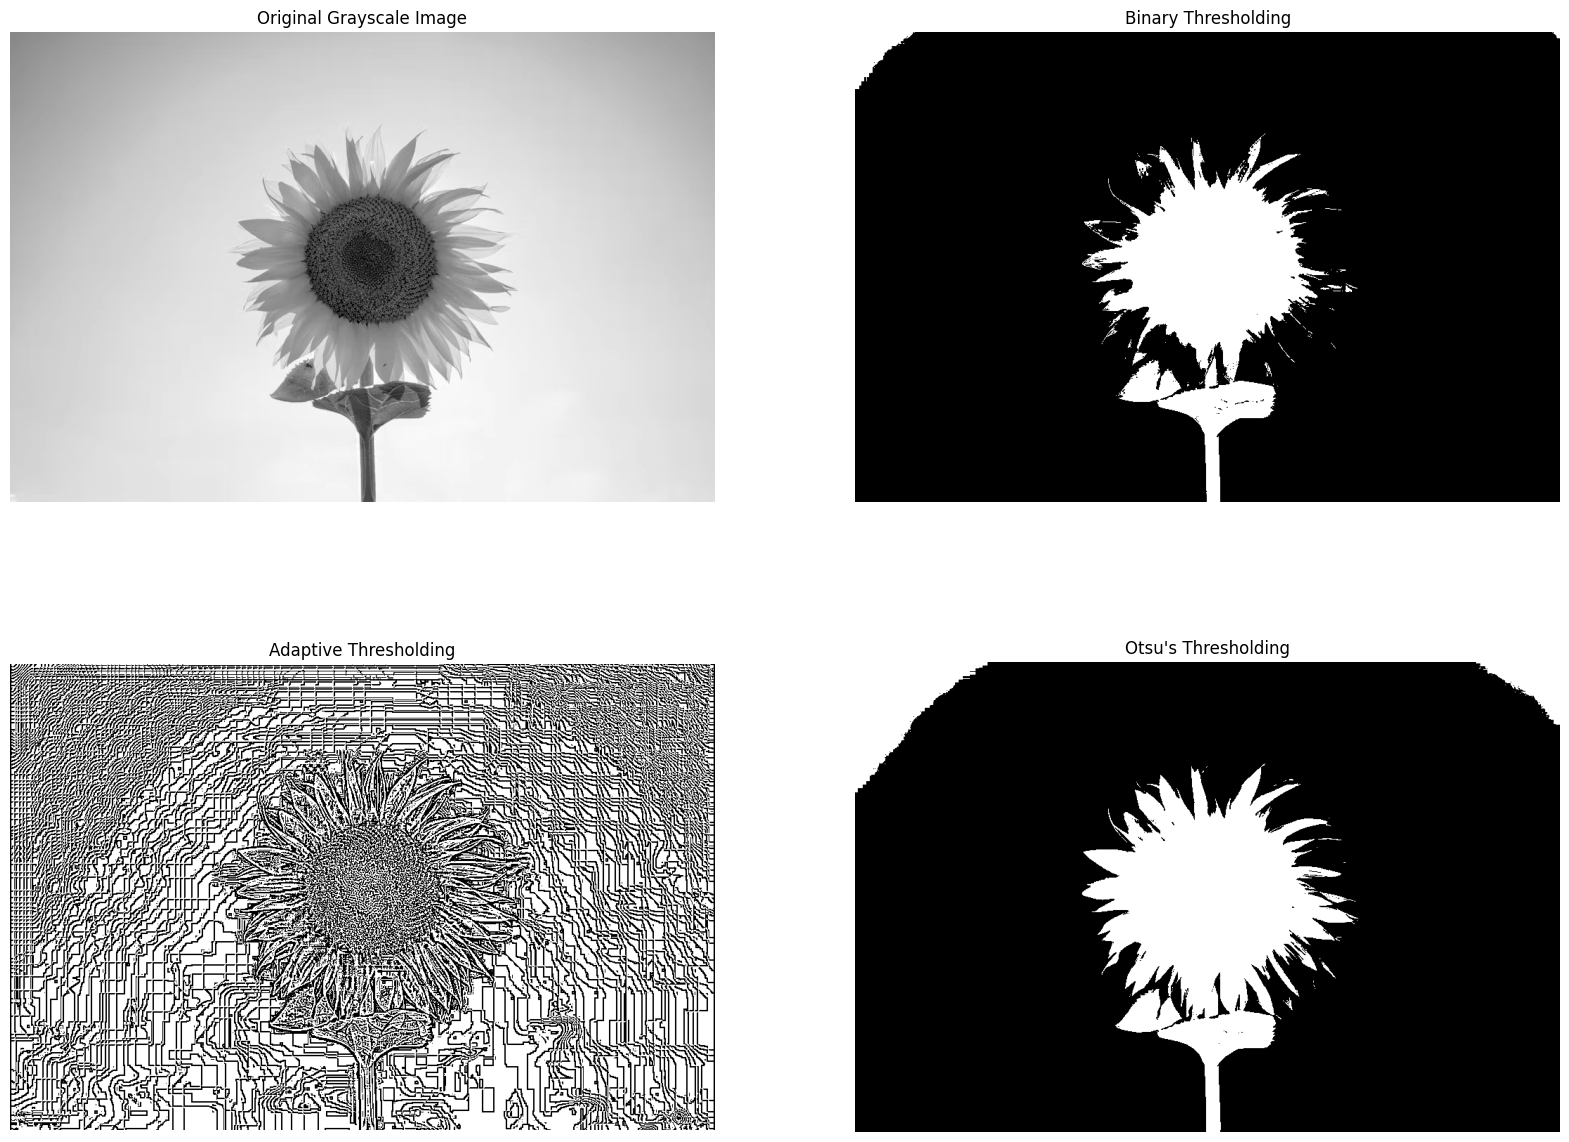

In [117]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(sun_img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(sun_binary, cmap='gray')
plt.axis('off')
plt.title('Binary Thresholding')

plt.subplot(2, 2, 3)
plt.imshow(sun_adaptive, cmap='gray')
plt.axis('off')
plt.title('Adaptive Thresholding')

plt.subplot(2, 2, 4)
plt.imshow(sun_otsu, cmap='gray')
plt.axis('off')
plt.title("Otsu's Thresholding")
plt.show()

- Based on the results, Otsu's thresholding appears to have offered the best segmentation, as it cleanly separates the sunflower from the background with well-defined boundaries and minimal noise. 
- While the binary thresholding also highlights the main object, it lacks adaptability in varying light conditions, for example, the lighter part of petals was not identified, and adaptive thresholding introduces excessive noise, which obscures clear object boundaries.

## 2. Line Detection Using Hough Transform

In [20]:
def detect_lines(image, rho=1, threshold=100, minLineLength=50, maxLineGap=10):
    
    new_img = image.copy()
    edges = cv2.Canny(new_img, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=rho, theta=np.pi / 180, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
    
    if lines is not None:
        # Draw the detected lines on the original image
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(new_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return new_img

In [21]:
road_img = cv2.imread("../images/road.png", 0)
building_img = cv2.imread("../images/building.png", 0)

In [22]:
road_edges = detect_lines(road_img)
building_edges = detect_lines(building_img)

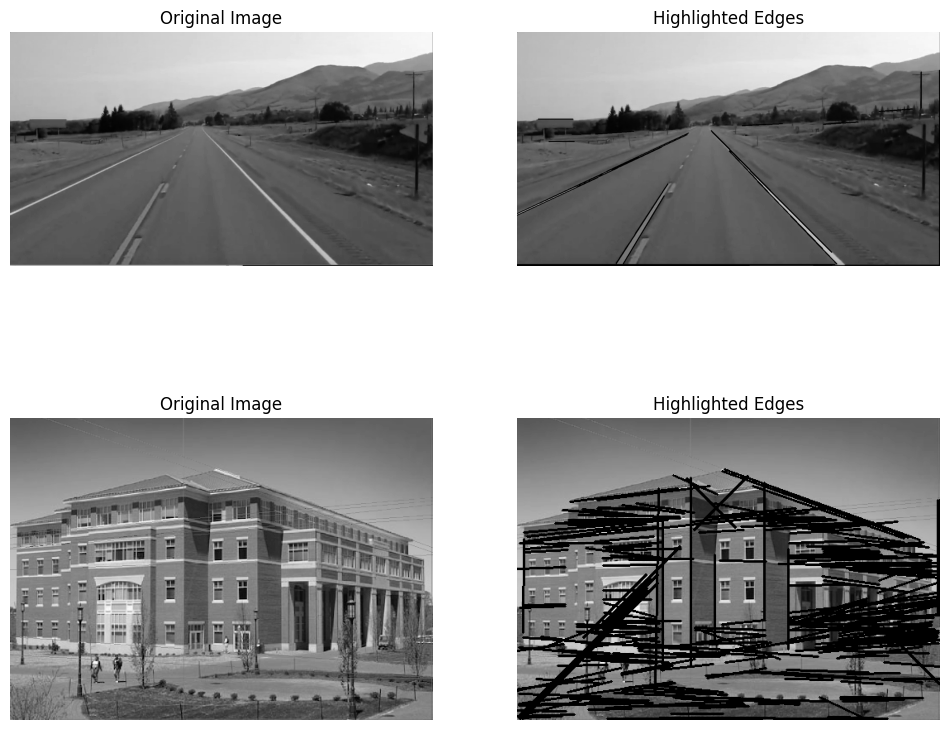

In [23]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(road_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(road_edges, cmap='gray')
plt.title("Highlighted Edges")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(building_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(building_edges, cmap='gray')
plt.title("Highlighted Edges")
plt.axis('off')

plt.show()

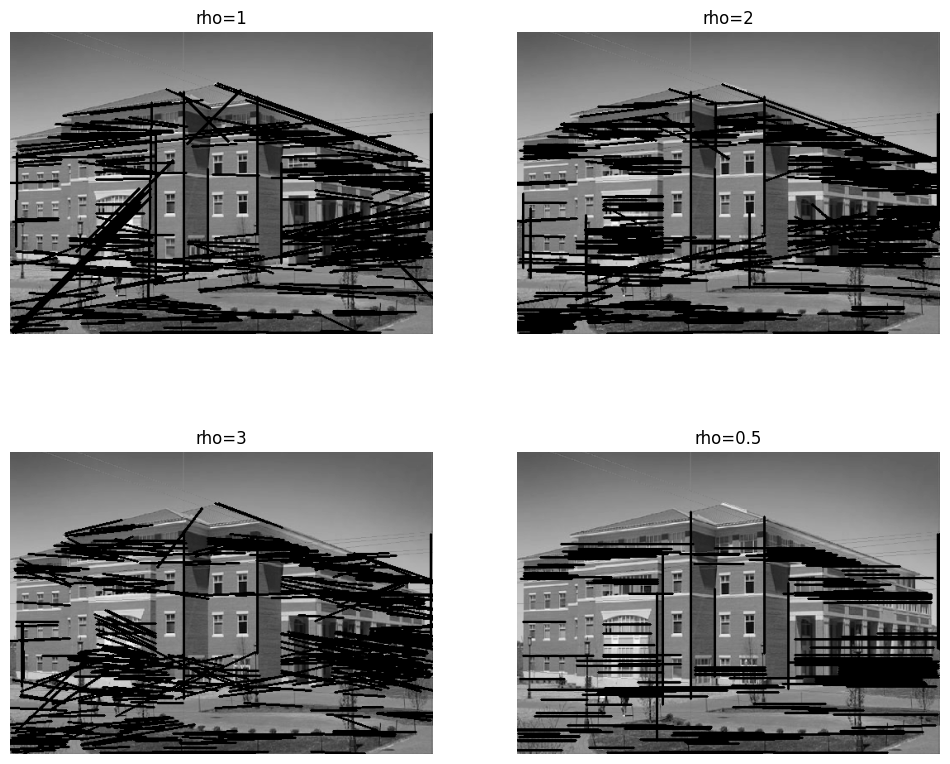

In [25]:
plt.figure(figsize=(12, 10))

building_edges = detect_lines(building_img, 1, 100, 50, 10)
plt.subplot(2, 2, 1)
plt.imshow(building_edges, cmap='gray')
plt.title("rho=1")
plt.axis('off')

building_edges = detect_lines(building_img, 2, 100, 50, 10)
plt.subplot(2, 2, 2)
plt.imshow(building_edges, cmap='gray')
plt.title("rho=2")
plt.axis('off')

building_edges = detect_lines(building_img, 3, 100, 50, 10)
plt.subplot(2, 2, 3)
plt.imshow(building_edges, cmap='gray')
plt.title("rho=3")
plt.axis('off')

building_edges = detect_lines(building_img, 0.5, 100, 50, 10)
plt.subplot(2, 2, 4)
plt.imshow(building_edges, cmap='gray')
plt.title("rho=0.5")
plt.axis('off')

plt.show()

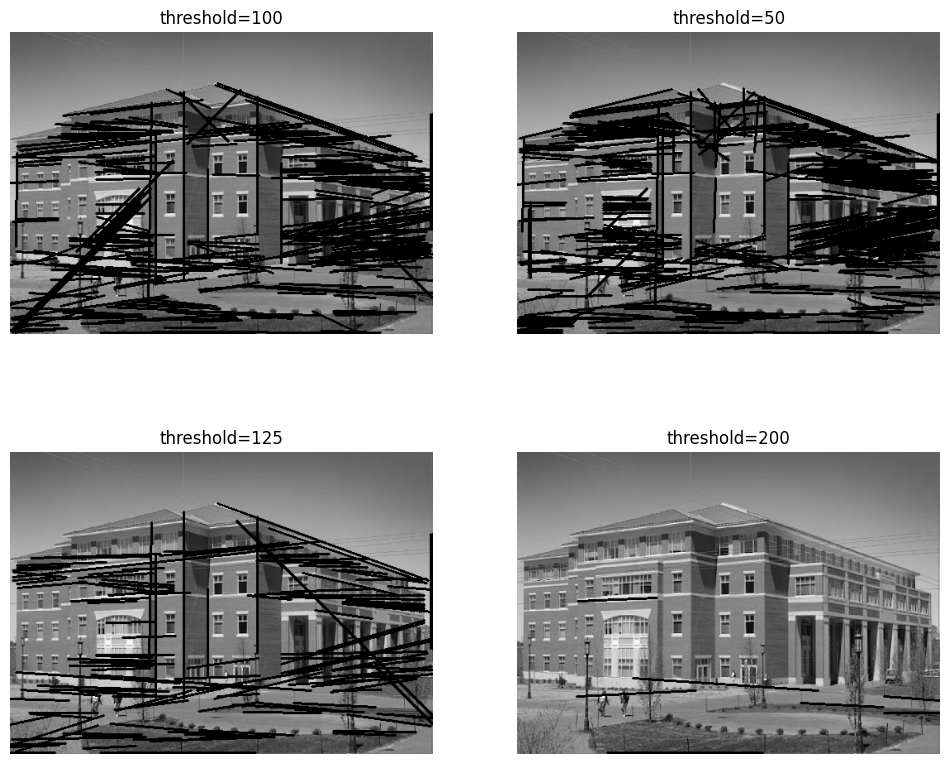

In [31]:
plt.figure(figsize=(12, 10))

building_edges = detect_lines(building_img, 1, 100, 50, 10)
plt.subplot(2, 2, 1)
plt.imshow(building_edges, cmap='gray')
plt.title("threshold=100")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 50, 50, 10)
plt.subplot(2, 2, 2)
plt.imshow(building_edges, cmap='gray')
plt.title("threshold=50")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 125, 50, 10)
plt.subplot(2, 2, 3)
plt.imshow(building_edges, cmap='gray')
plt.title("threshold=125")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 200, 50, 10)
plt.subplot(2, 2, 4)
plt.imshow(building_edges, cmap='gray')
plt.title("threshold=200")
plt.axis('off')

plt.show()

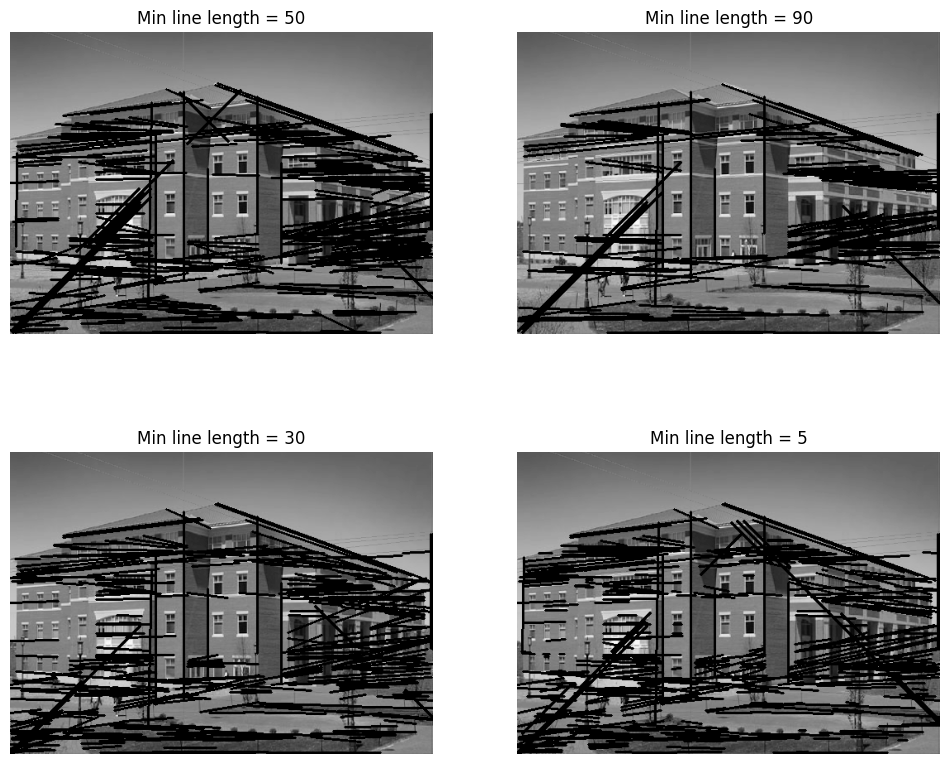

In [42]:
plt.figure(figsize=(12, 10))

building_edges = detect_lines(building_img, 1, 100, 50, 10)
plt.subplot(2, 2, 1)
plt.imshow(building_edges, cmap='gray')
plt.title("Min line length = 50")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 90, 10)
plt.subplot(2, 2, 2)
plt.imshow(building_edges, cmap='gray')
plt.title("Min line length = 90")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 30, 10)
plt.subplot(2, 2, 3)
plt.imshow(building_edges, cmap='gray')
plt.title("Min line length = 30")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 5, 10)
plt.subplot(2, 2, 4)
plt.imshow(building_edges, cmap='gray')
plt.title("Min line length = 5")
plt.axis('off')

plt.show()

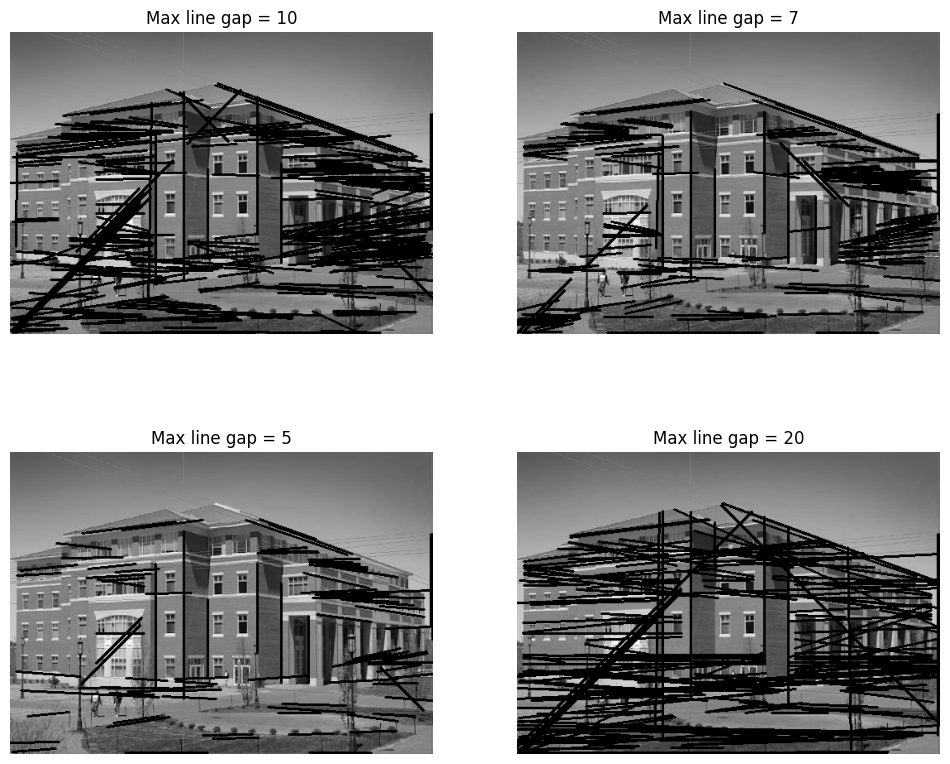

In [41]:
plt.figure(figsize=(12, 10))

building_edges = detect_lines(building_img, 1, 100, 50, 10)
plt.subplot(2, 2, 1)
plt.imshow(building_edges, cmap='gray')
plt.title("Max line gap = 10")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 50, 7)
plt.subplot(2, 2, 2)
plt.imshow(building_edges, cmap='gray')
plt.title("Max line gap = 7")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 50, 5)
plt.subplot(2, 2, 3)
plt.imshow(building_edges, cmap='gray')
plt.title("Max line gap = 5")
plt.axis('off')

building_edges = detect_lines(building_img, 1, 100, 50, 20)
plt.subplot(2, 2, 4)
plt.imshow(building_edges, cmap='gray')
plt.title("Max line gap = 20")
plt.axis('off')

plt.show()

- Increasing the threshold parameter results in fewer, more prominent lines being detected, as it requires more votes for a line to be considered valid. 
- Raising the minLineLength filters out shorter line segments, leading to the detection of only longer lines.
- Increasing maxLineGap allows for linking more distant points, creating longer continuous lines from segmented parts.
- A smaller rho value increases line detection precision but may slow processing, while a larger rho value reduces precision but speeds up detection.

## Circle Detection Using Hough Circle Transform

In [75]:
def detect_circles(img, dp=1.2, min_dist=30, param1=50, param2=30, min_radius=0, max_radius=0):
    
    new_img = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, minDist=min_dist, param1=param1, param2=param2, minRadius=min_radius, maxRadius=max_radius)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        
        for (x, y, r) in circles:
            # Draw the circle in green
            cv2.circle(new_img, (x, y), r, (255, 255, 255), 4)
            # Draw the center of the circle in red
            cv2.circle(new_img, (x, y), 2, (0, 0, 255), 3)

    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return new_img

In [ ]:
circles_img = cv2.imread("../images/colorful-circles.png")

In [ ]:
circle_edges = detect_circles(circles_img, param2=30, min_radius=0, max_radius=50)

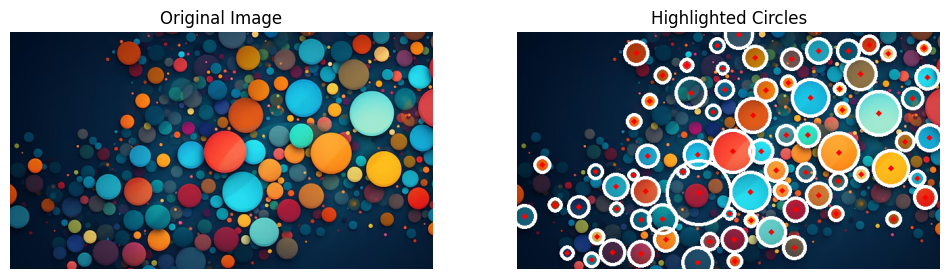

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(circles_img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(circle_edges, cmap='gray')
plt.title("Highlighted Circles")
plt.axis('off')

plt.show()

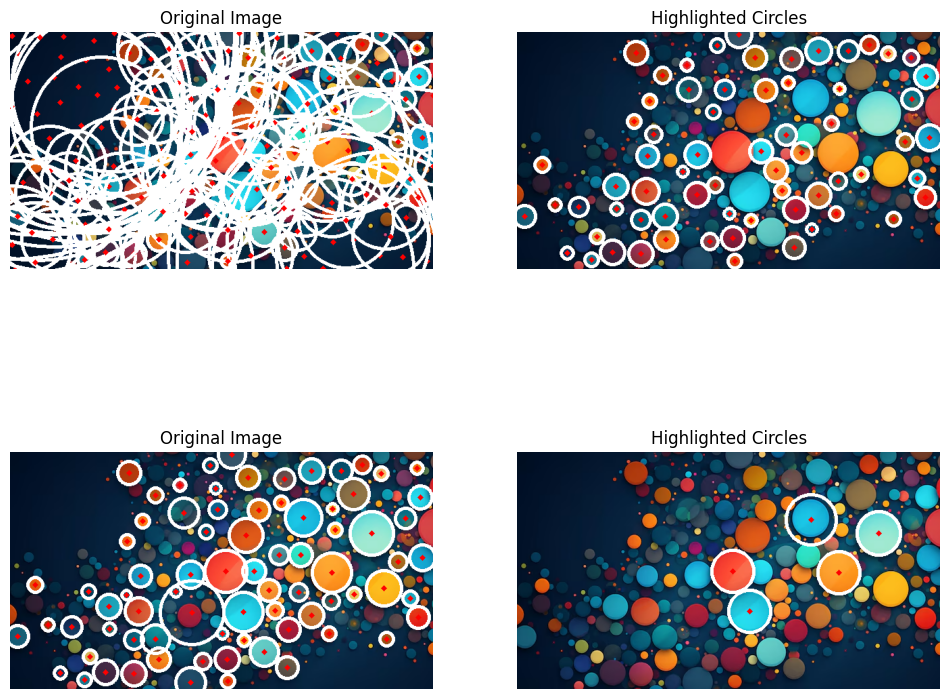

In [88]:
plt.figure(figsize=(12, 10))

circle_edges = detect_circles(circles_img)
plt.subplot(2, 2, 1)
plt.imshow(circle_edges, cmap='gray')
plt.title("Original Image")
plt.axis('off')

circle_edges = detect_circles(circles_img, min_radius=0, max_radius=20)
plt.subplot(2, 2, 2)
plt.imshow(circle_edges, cmap='gray')
plt.title("Highlighted Circles")
plt.axis('off')

circle_edges = detect_circles(circles_img, min_radius=0, max_radius=50)
plt.subplot(2, 2, 3)
plt.imshow(circle_edges, cmap='gray')
plt.title("Original Image")
plt.axis('off')

circle_edges = detect_circles(circles_img, min_radius=30, max_radius=50)
plt.subplot(2, 2, 4)
plt.imshow(circle_edges, cmap='gray')
plt.title("Highlighted Circles")
plt.axis('off')

plt.show()

- The minimum radius of circles to be detected: Setting this value higher filtered out smaller, unwanted circles.
- The maximum radius of circles to be detected: This limited detection to circles within a certain size range. This also eliminated many false positive circles, since when allowed bigger radius, many unrelated points happened to lie on a circle.

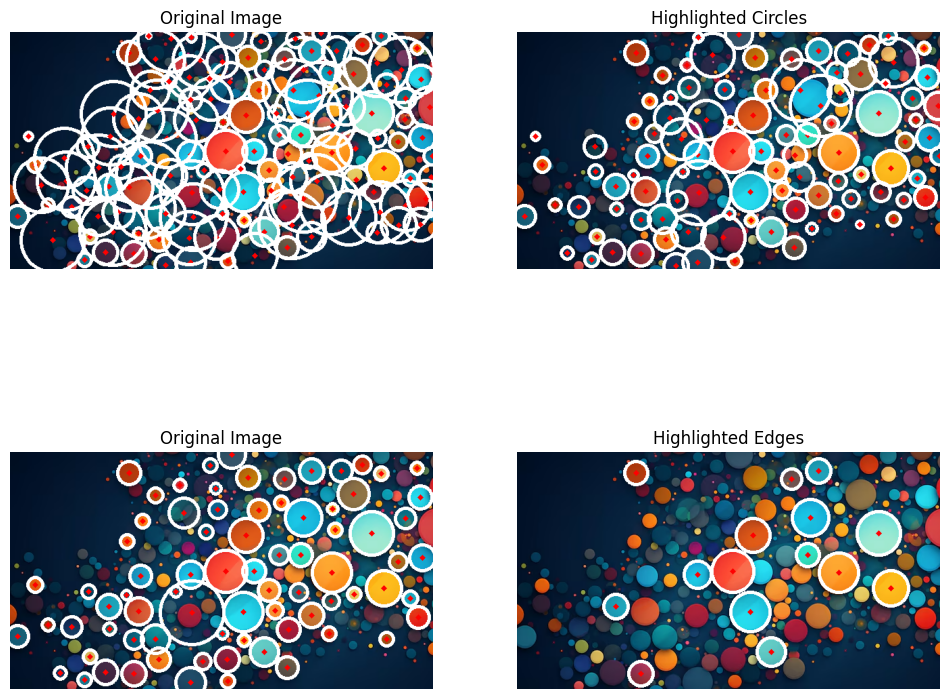

In [96]:
plt.figure(figsize=(12, 10))

circle_edges = detect_circles(circles_img, param2=10, min_radius=0, max_radius=50)
plt.subplot(2, 2, 1)
plt.imshow(circle_edges, cmap='gray')
plt.title("Original Image")
plt.axis('off')

circle_edges = detect_circles(circles_img, param2=20, min_radius=0, max_radius=50)
plt.subplot(2, 2, 2)
plt.imshow(circle_edges, cmap='gray')
plt.title("Highlighted Circles")
plt.axis('off')

circle_edges = detect_circles(circles_img, param2=30, min_radius=0, max_radius=50)
plt.subplot(2, 2, 3)
plt.imshow(circle_edges, cmap='gray')
plt.title("Original Image")
plt.axis('off')

circle_edges = detect_circles(circles_img, param2=70, min_radius=0, max_radius=50)
plt.subplot(2, 2, 4)
plt.imshow(circle_edges, cmap='gray')
plt.title("Highlighted Edges")
plt.axis('off')

plt.show()

- A higher param2 value means that only circles with a strong edge (i.e., many votes) will be detected. The result had detected fewer circles, but more accurate.
- A lower param2 value will make the algorithm more sensitive. It detected more circles, but increased the percentage of false positives.

## Harris Corner Detection

In [ ]:
def detect_and_mark_corners(img, k):
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = np.float32(gray_img)
    new_img = img.copy()
    dst = cv2.cornerHarris(gray_img, 2, 3, k=k)
    
    # Dilate the result to mark the corners
    dst = cv2.dilate(dst, None)
    
    # Threshold for detecting strong corners
    new_img[dst > 0.01 * dst.max()] = [255, 0, 0] 

    return new_img

In [100]:
chess_img = cv2.imread("../images/chess.jpg")
chess_img = cv2.cvtColor(chess_img, cv2.COLOR_BGR2RGB)

In [ ]:
chess_corners = detect_and_mark_corners(chess_img, 0.04)

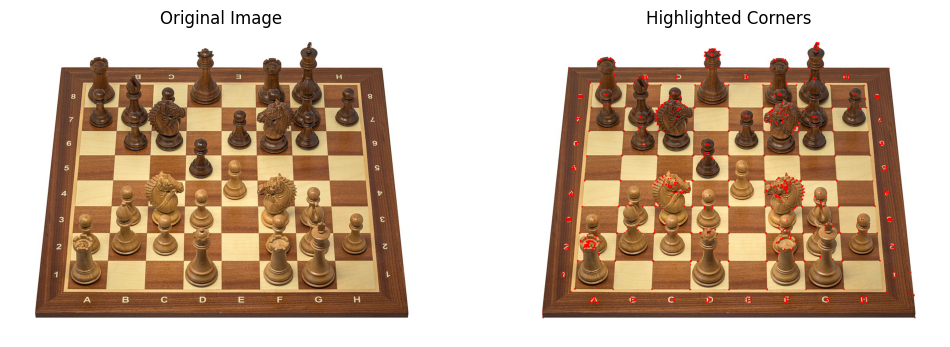

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(chess_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(chess_corners)
plt.title("Highlighted Corners")
plt.axis('off')

plt.show()

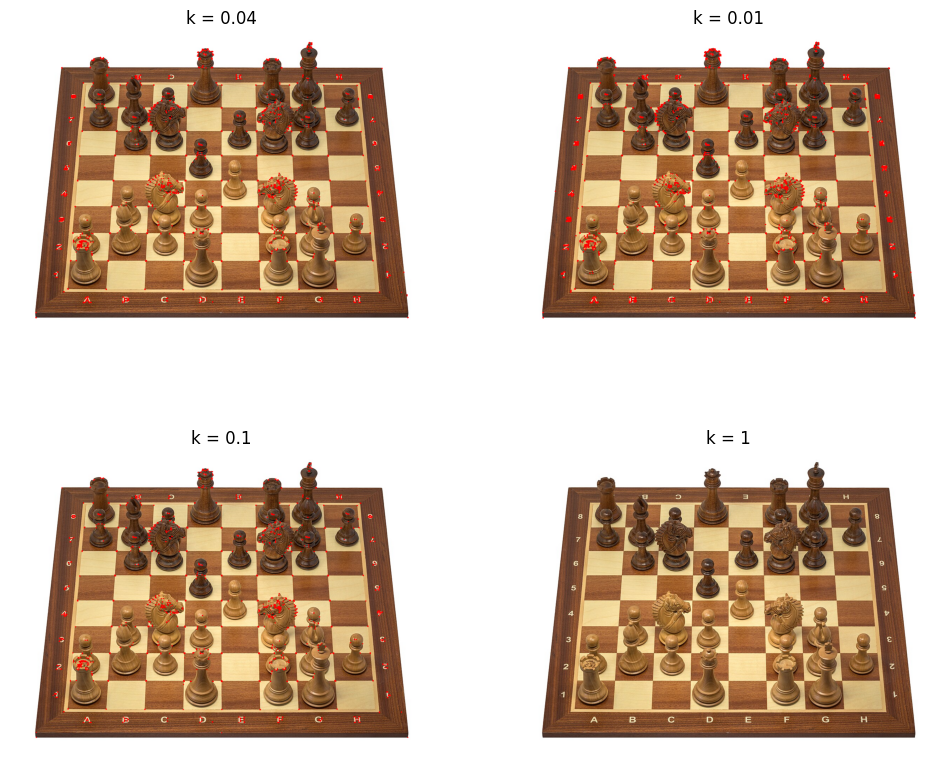

In [109]:
plt.figure(figsize=(12, 10))

chess_corners = detect_and_mark_corners(chess_img, 0.04)
plt.subplot(2, 2, 1)
plt.imshow(chess_corners)
plt.title("k = 0.04")
plt.axis('off')

chess_corners = detect_and_mark_corners(chess_img, 0.01)
plt.subplot(2, 2, 2)
plt.imshow(chess_corners)
plt.title("k = 0.01")
plt.axis('off')

chess_corners = detect_and_mark_corners(chess_img, 0.1)
plt.subplot(2, 2, 3)
plt.imshow(chess_corners)
plt.title("k = 0.1")
plt.axis('off')

chess_corners = detect_and_mark_corners(chess_img, 1)
plt.subplot(2, 2, 4)
plt.imshow(chess_corners)
plt.title("k = 1")
plt.axis('off')

plt.show()

- The value of k balances the sensitivity of the detector.
- Smaller k detected more corners, including corners of letters on the borad, i.e, they included noise.
- Larger k detected fewer, more robust corners.

## Short Theory

The Hough Transform detects lines and circles differently due to the variations in their parameter spaces. For line detection, it transforms points from the image space into the 2D parameter space defined by roh (ρ) (the perpendicular distance from the origin) and theta (θ) (the angle of the line). This is computationally efficient as only two parameters need to be accumulated.


For circle detection, the transform extends to a 3D parameter space defined by the circle's center coordinates (x, y) and its radius r. This increase in dimensionality significantly raises computational complexity due to the need for more extensive accumulator space and increased operations. The circle detection process often requires more sophisticated methods to reduce complexity, such as using edge and gradient information to limit the range of possible centers and radii considered.

For line detection, the method is efficient and effective in finding prominent linear structures even in noisy images, as the 2D accumulator array simplifies voting and peak detection. However, it may struggle with detecting shorter or intersecting lines due to limited resolution in the parameter space.

In contrast, circle detection often results in higher computational costs due to the need to search across a 3D space. This can lead to slower performance, especially when multiple radii are involved. The accuracy of circle detection depends heavily on clear edge definitions and gradient consistency. In images with significant noise or overlapping circular features, the transform might detect false positives or require preprocessing steps, such as edge detection with Canny, to enhance the results. Adjusting thresholds is also critical for balancing sensitivity and specificity in both applications.